In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def normalize(volume):
    """Normalize the volume to 0-1 scale"""
    min_val = np.min(volume)
    max_val = np.max(volume)
    return (volume - min_val) / (max_val - min_val)

def generate_slices_flat_structure_tiff_and_rotate(src_dir, base_tgt_dir):
    """
    Generate 2D slices from 3D NIfTI grey matter masks, rotate them by 90 degrees,
    and place them into train, test, or val directories based on the patient ID.
    The output filenames are formatted as 'KCLXXXX_Y.tiff', maintaining the 0-1 normalization.
    """
    os.makedirs(base_tgt_dir, exist_ok=True)
    
    for filename in os.listdir(src_dir):
        if filename.endswith(".nii.gz"):
            id = filename.split("_")[0].replace("sub-", "")
            id_num = int(id)
            filepath = os.path.join(src_dir, filename)
            
            if 1 <= id_num <= 20:
                sub_dir = "train"
            elif 21 <= id_num <= 30:
                sub_dir = "test"
            elif 31 <= id_num <= 37:
                sub_dir = "val"
            else:
                continue

            tgt_dir = os.path.join(base_tgt_dir, sub_dir)
            os.makedirs(tgt_dir, exist_ok=True)

            nifti = nib.load(filepath)
            volume_norm = normalize(nifti.get_fdata())
            
            for i in range(volume_norm.shape[-1]):
                slice = volume_norm[:, :, i]
                slice_image = Image.fromarray(slice.astype(np.float32))
                rotated_slice = slice_image.rotate(90, expand=True)  # Rotate by 90 degrees
                
                slice_filename = f"KCL{id}_{i+1}.tiff"
                rotated_slice.save(os.path.join(tgt_dir, slice_filename), format='TIFF')
                print(f"Saved: {os.path.join(tgt_dir, slice_filename)}")

if __name__ == "__main__":
    src_dir = "./GM"  # Your source directory for NIfTI files
    base_tgt_dir = "./data/processed/sorted_masks"  # Your base target directory for TIFF files
    generate_slices_flat_structure_tiff_and_rotate(src_dir, base_tgt_dir)


In [3]:
import os
import numpy as np
from PIL import Image

def ensure_scale_to_1(image):
    """Ensure the image is in the 0-1 scale."""
    if np.max(image) > 1:
        image = image / 255.0
    return image

def process_directory_flat_structure(src_base, tgt_base):
    """
    Process all NumPy files in the source base directory, ensuring they are in the 0-1 range,
    and save them in the corresponding train, test, or val directories with filenames formatted
    as 'KCLXXXX_Y.tiff', where Y has no leading zeros.
    """
    if not os.path.exists(tgt_base):
        os.makedirs(tgt_base, exist_ok=True)

    for root, dirs, files in os.walk(src_base):
        base_folder_name = os.path.basename(root)
        # Skip processing if the directory does not match the expected patient folder format
        if not base_folder_name.startswith('KCL_'):
            continue

        patient_number = base_folder_name.replace('KCL_', '')
        try:
            patient_number_int = int(patient_number)
        except ValueError:
            continue  # Skip directories that don't have an integer after 'KCL_'

        # Determine the target subdirectory based on patient number
        if 1 <= patient_number_int <= 20:
            sub_dir = 'train'
        elif 21 <= patient_number_int <= 30:
            sub_dir = 'test'
        elif 31 <= patient_number_int <= 37:
            sub_dir = 'val'
        else:
            continue  # Skip files outside the specified ranges

        target_dir = os.path.join(tgt_base, sub_dir)
        os.makedirs(target_dir, exist_ok=True)

        for filename in files:
            if filename.endswith('.npy'):
                img_data = np.load(os.path.join(root, filename))
                scaled_img_1 = ensure_scale_to_1(img_data)
                slice_number = int(filename.replace('IMG', '').split('.')[0])
                output_filename = f"KCL{patient_number}_{slice_number}.tiff"
                img_to_save = Image.fromarray(scaled_img_1.astype(np.float32))
                img_to_save.save(os.path.join(target_dir, output_filename), format='TIFF')
                print(f"Saved: {os.path.join(target_dir, output_filename)}")

if __name__ == "__main__":
    src_base = 'data/processed/brain_extracted'
    tgt_base = 'data/processed/sorted_imgs'
    process_directory_flat_structure(src_base, tgt_base)


Saved: data/processed/sorted_imgs/val/KCL0034_57.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_225.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_94.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_154.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_76.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_82.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_7.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_174.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_147.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_65.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_208.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_199.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_161.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_84.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_2.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_47.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_215.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_178.tiff
Saved: data/processed

In [ ]:
import os
import numpy as np
from PIL import Image

def ensure_scale_to_1(image):
    """Ensure the image is in the 0-1 scale."""
    if np.max(image) > 1:
        image = image / 255.0
    return image

def process_directory_flat_structure(src_base, tgt_base):
    """
    Process all NumPy files in the source base directory, ensuring they are in the 0-1 range,
    and save them in the corresponding train, test, or val directories with filenames formatted
    as 'KCLXXXX_Y.tiff', where Y has no leading zeros.
    """
    if not os.path.exists(tgt_base):
        os.makedirs(tgt_base, exist_ok=True)

    for root, dirs, files in os.walk(src_base):
        base_folder_name = os.path.basename(root)
        # Skip processing if the directory does not match the expected patient folder format
        if not base_folder_name.startswith('KCL_'):
            continue

        patient_number = base_folder_name.replace('KCL_', '')
        try:
            patient_number_int = int(patient_number)
        except ValueError:
            continue  # Skip directories that don't have an integer after 'KCL_'

        # Determine the target subdirectory based on patient number
        if 1 <= patient_number_int <= 20:
            sub_dir = 'train'
        elif 21 <= patient_number_int <= 30:
            sub_dir = 'test'
        elif 31 <= patient_number_int <= 37:
            sub_dir = 'val'
        else:
            continue  # Skip files outside the specified ranges

        target_dir = os.path.join(tgt_base, sub_dir)
        os.makedirs(target_dir, exist_ok=True)

        for filename in files:
            if filename.endswith('.npy'):
                img_data = np.load(os.path.join(root, filename))
                scaled_img_1 = ensure_scale_to_1(img_data)
                slice_number = int(filename.replace('IMG', '').split('.')[0])
                output_filename = f"KCL{patient_number}_{slice_number}.tiff"
                img_to_save = Image.fromarray(scaled_img_1.astype(np.float32))
                img_to_save.save(os.path.join(target_dir, output_filename), format='TIFF')
                print(f"Saved: {os.path.join(target_dir, output_filename)}")

if __name__ == "__main__":
    src_base = 'data/processed/windowed'
    tgt_base = 'data/processed/sorted_imgs_no_brain_extraction'
    process_directory_flat_structure(src_base, tgt_base)


In [ ]:
import shutil
from pathlib import Path
running_task = 'gm_alt'  # Adjust this based on the specific mask you are working with

SOURCE_DIR = './data/processed/'

dir_img = Path(SOURCE_DIR + 'sliced_brain_extracted/')  # CT images directory
dir_mask = Path(SOURCE_DIR + 'processed_masks/' + running_task)  # Mask directory

# Assuming you will create directories for train/test/val during the dataset preparation step
dir_img_train = dir_img / 'train'
dir_mask_train = dir_mask / 'train'

dir_img_val = dir_img / 'val'
dir_mask_val = dir_mask / 'val'

dir_img_test = dir_img / 'test'
dir_mask_test = dir_mask / 'test'


In [ ]:
# shift output to train test val
def split_data(src_dir, base_dir):
    """
    Splits data into train, val, and test sets based on ID ranges and moves them to the respective directories.
    """
    for folder_name in os.listdir(src_dir):
        folder_id = get_id_from_name(folder_name)
        if folder_id is None:
            continue
        
        # Determine the destination sub-directory (train, val, or test)
        if 1 <= folder_id <= 20:
            split_dir = "train"
        elif 21 <= folder_id <= 30:
            split_dir = "test"
        elif 31 <= folder_id <= 37:
            split_dir = "val"
        else:
            continue  # Skip if outside range
        
        src_path = os.path.join(src_dir, folder_name)
        dest_path = os.path.join(base_dir, split_dir, folder_name)
        
        # Ensure the target directory exists
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)

        # Move the source folder to the destination
        if os.path.exists(dest_path):
            shutil.rmtree(dest_path)  # Remove existing directory to avoid duplication
        shutil.move(src_path, dest_path)  # Use shutil.move to relocate folders
        print(f"Moved {folder_name} into {split_dir}")

if __name__ == "__main__":
    base_dir = "./data"  # Point to the top-level data directory
    processed_dir = os.path.join(base_dir, "processed")
    
    # Define source directories within 'processed'
    targets = ["sliced_brain_extracted", "processed_masks"]
    
    for target in targets:
        src_dir = os.path.join(processed_dir, target)
        split_data(src_dir, base_dir)  # Pass the correct base directory


In [ ]:
import numpy as np

# Load the .npy file
file_path = "data/processed/processed_masks/sub-0002_space-MNI_T1w_brain_pve_1/sub-0002_space-MNI_T1w_brain_pve_1_slice_1.npy"
img_data = np.load(file_path)

# Print the shape of the loaded image data
img_data.shape

In [ ]:
import imageio
import numpy as np

# Load the .tiff file using imageio
file_path = "../../../../data/wang1448/FYP_WANG1448/TransUnet/oasis_freesurfer/labels_norm/ct_norm/OAS31168_99.tiff"
img_data = imageio.imread(file_path)

# Print the shape of the loaded image data
print(img_data.shape)


In [ ]:
import imageio
import numpy as np

# Load the .tiff file using imageio
file_path = "data/processed/sorted_imgs_no_brain_extraction/train/KCL0001_1.tiff"
img_data = imageio.imread(file_path)

# Print the shape of the loaded image data
print(img_data.shape)


In [ ]:
"""
"data/oasis/ct_norm_resized",
    "data/oasis/gm_resized
"""

import imageio
import numpy as np

# Load the .tiff file using imageio
file_path = "data/oasis/ct_norm_resized/OAS30001_51.tiff"
img_data = imageio.imread(file_path)

# Print the shape of the loaded image data
print(img_data.shape)

# Check the maximum and minimum values
max_value = np.max(img_data)
min_value = np.min(img_data)

if max_value > 1:
    print("Image values are in the range 0-255.")
else:
    print("Image values are in the range 0-1.")


In [ ]:
import os
import imageio
from PIL import Image
import numpy as np
from collections import defaultdict

def normalize_image(img_array):
    """
    Normalize image array to [0, 1] range.
    """
    img_min = img_array.min()
    img_max = img_array.max()
    return (img_array - img_min) / (img_max - img_min)

def resize_rotate_convert_save_images(src_dir, dst_dir, target_shape=(243, 207), rotation_angle=90):
    """
    Resize, rotate all .tiff and .png files in the specified source directory to the target shape,
    normalize to [0, 1], convert .png to .tiff (if applicable), ensure float32 data type,
    and save them with sequential labels in the destination directory using imageio.

    Parameters:
    - src_dir: Source directory containing .tiff and .png files.
    - dst_dir: Destination directory for saving processed .tiff files.
    - target_shape: A tuple indicating the new image size (width, height).
    - rotation_angle: Angle to rotate the image. Positive values for counter-clockwise rotation.
    """
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir, exist_ok=True)

    # Group files by their unique identifier (XXXX)
    file_groups = defaultdict(list)
    for filename in os.listdir(src_dir):
        if filename.endswith('.tiff') or filename.endswith('.png'):
            identifier = filename.split('_')[0]
            file_groups[identifier].append(filename)
    
    # Process each group, ensuring labels for Y start from 1
    for identifier, filenames in file_groups.items():
        # Sort filenames to maintain order
        filenames.sort()
        for i, filename in enumerate(filenames, start=1):
            src_filepath = os.path.join(src_dir, filename)

            # Load image
            img_array = imageio.imread(src_filepath)

            # Normalize the image to [0, 1]
            img_array = normalize_image(img_array)

            # Convert to PIL Image for processing
            img = Image.fromarray(np.uint8(img_array * 255))  # Temporarily convert back for PIL processing
            resized_img = img.resize(target_shape, Image.LANCZOS)
            rotated_img = resized_img.rotate(rotation_angle, expand=True)

            # Convert back to numpy array for saving, ensure float32 and normalize again
            final_img_array = np.array(rotated_img).astype(np.float32) / 255.0

            # New filename with .tiff extension and sequential Y labels
            new_filename = f"{identifier}_{i}.tiff"
            dst_filepath = os.path.join(dst_dir, new_filename)

            # Save the image
            imageio.imwrite(dst_filepath, final_img_array)
            print(f"Processed and saved: {dst_filepath}")

# Source and destination directories
src_dirs = [
    "../../../../data/wang1448/FYP_WANG1448/TransUnet/oasis_freesurfer/labels_norm/ct_norm",
    "../../../../data/wang1448/FYP_WANG1448/TransUnet/oasis_freesurfer/labels_norm/gm"
]
dst_dirs = [
    "data/oasis/ct_norm_resized",
    "data/oasis/gm_resized"
]

# Resize, rotate, convert (if needed), and save files in each source directory to their respective destination directories
for src, dst in zip(src_dirs, dst_dirs):
    resize_rotate_convert_save_images(src, dst, target_shape=(243, 207), rotation_angle=90)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming the file is uploaded to the environment and accessible at the specified path
file_path = 'data/processed/sorted_masks/train/KCL0001_1.tiff'

# Open and display the image
img = Image.open(file_path)
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide axis labels and ticks
plt.show()


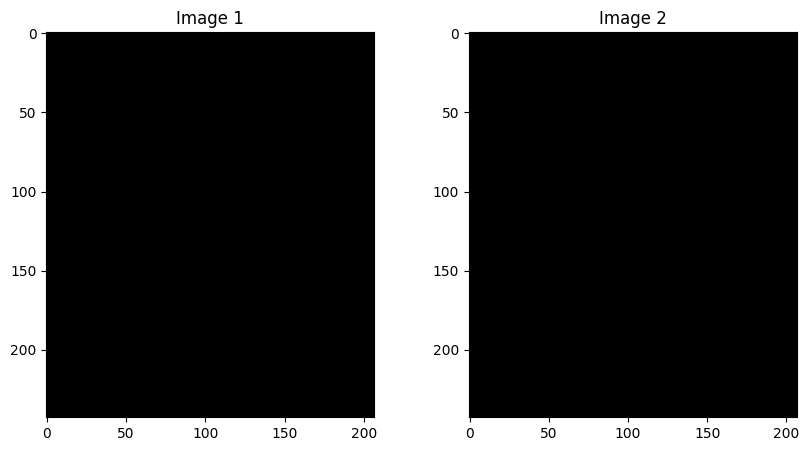

Image 1 shape: (207, 243)
Image 2 shape: (207, 243)
Image 1 stats: mean=0.0, std=0.0
Image 2 stats: mean=0.09939566999673843, std=0.20592954754829407
Metadata for Image 1: {'compression': 'raw', 'dpi': (1, 1), 'resolution': (1, 1)}
Metadata for Image 2: {'compression': 'raw', 'resolution': (1.0, 1.0)}
Image 1 data type: float32
Image 2 data type: float32


In [2]:
#comapring 2 tiffs
from PIL import Image
import matplotlib.pyplot as plt

img_path1 = 'data/test_current_data/KCL0001_1.tiff'
img_path2 = 'data/test_new_data/OAS30001_1.tiff'

img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.show()
print(f"Image 1 shape: {img1.size}")  # PIL uses width, height
print(f"Image 2 shape: {img2.size}")
import numpy as np

img1_array = np.array(img1)
img2_array = np.array(img2)

print(f"Image 1 stats: mean={np.mean(img1_array)}, std={np.std(img1_array)}")
print(f"Image 2 stats: mean={np.mean(img2_array)}, std={np.std(img2_array)}")
metadata1 = img1.info
metadata2 = img2.info

print("Metadata for Image 1:", metadata1)
print("Metadata for Image 2:", metadata2)

print(f"Image 1 data type: {img1_array.dtype}")
print(f"Image 2 data type: {img2_array.dtype}")

